<a href="https://colab.research.google.com/github/Endurance-HWBT/ML-Project/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error,median_absolute_error
transformer = StandardScaler()
import copy
import random

# Data analysis and cleaning and prep

In [ ]:
df = pd.read_csv('/content/HousingData.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/HousingData.csv'

In [ ]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [ ]:
df_clean = df.copy()
df_clean = df_clean.dropna()

In [ ]:
df_clean[df_clean.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


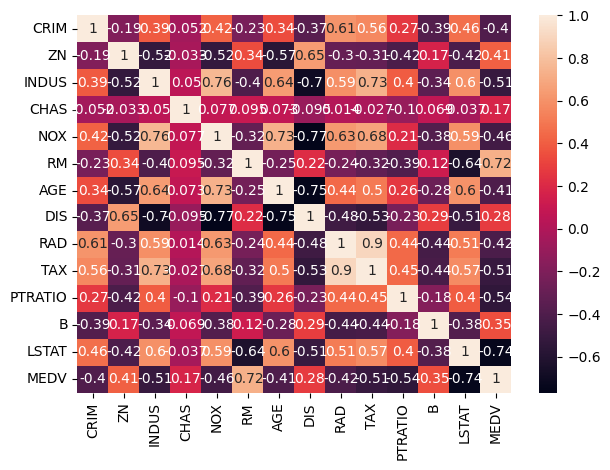

In [ ]:
corr = df_clean.corr()
sns.heatmap(corr, annot=True )
plt.tight_layout()
plt.show()

In [ ]:
y = df_clean['MEDV']
df_clean.drop(['MEDV'],axis=1,inplace=True)
x = df_clean
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Helper functions

In [ ]:
def evaluvate(y_test,y_pred):
  MAE= mean_absolute_error(y_test, y_pred)
  MSE= mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  R2 = r2_score(y_test, y_pred)
  MedAE = median_absolute_error(y_test, y_pred)
  print('MAE:',MAE )
  print('MSE:',MSE )
  print('RMSE:',RMSE)
  print('R2:', R2)
  print('MedAE:',MedAE)
  return MAE,MSE,RMSE,R2,MedAE

In [ ]:
class Train_helper():
  def __init__(self,model):
    self.n_estimators = 100
    self.feature_indices = []
    self.model_weights = []
    self.model = model
    self.models = []

  def train(self,x,y):
    np.random.seed(42)
    n_samples = x.shape[0]
    n_features = x.shape[1]
    for i in range(self.n_estimators):
      idx = np.random.choice(n_samples, size=n_samples, replace=True)
      x_boot = x.iloc[idx]
      y_boot = y.iloc[idx]

      oob_idx = np.setdiff1d(np.arange(n_samples), idx)
      x_oob = x.iloc[oob_idx]
      y_oob = y.iloc[oob_idx]

      # k = int(np.sqrt(n_features))
      # k = random.randint(5,n_features)
      k = n_features
      feat_idx = np.random.choice(n_features, k, replace=False)
      self.feature_indices.append(feat_idx)
      x_boot = x_boot.iloc[:, feat_idx]
      m = copy.deepcopy(self.model)
      m.fit(x_boot, y_boot)
      self.models.append(m)

      if len(oob_idx) > 0:
                x_oob_sub = x_oob.iloc[:, feat_idx]
                oob_pred = m.predict(x_oob_sub)
                mse = mean_absolute_error(y_oob, oob_pred)

                # convert MSE → weight (lower mse → higher weight)
                weight = 1 / (mse + 1e-8)
      else:
          weight = 1.0
      self.model_weights.append(weight)

    self.model_weights = np.array(self.model_weights)
    self.model_weights = self.model_weights / self.model_weights.sum()

  def predict(self,x):
    preds = []
    for model, feat_idx in zip(self.models, self.feature_indices):
      x_sub = x[:, feat_idx]
      preds.append(model.predict(x_sub))
    preds = np.array(preds)
    weighted_pred = np.average(preds, axis=0, weights=self.model_weights)
    return weighted_pred

In [ ]:
metric_list = ['MAE','MSE','RMSE','R2','MedAE']

#regression

## Random forest controll

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# x_train = transformer.fit_transform(x_train)
# x_test = transformer.transform(x_test)
regr = RandomForestRegressor(n_estimators=100,random_state=42)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
rfMAE,rfMSE,rfRMSE,rfR2,rfMedAE = evaluvate(y_test,y_pred)

MAE: 2.761949367088606
MSE: 28.614914050632912
RMSE: 5.349290985788015
R2: 0.6607453847034125
MedAE: 1.603999999999992


## linear regression

### multiple model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
obj = Train_helper(model=model)
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj.train(x=pd.DataFrame(x_train1),y=pd.Series(y_train.values))
y_pred = obj.predict(x_test1)
lr1MAE,lr1MSE,lr1RMSE,lr1R2,lr1MedAE = evaluvate(y_test,y_pred)

MAE: 3.361967654061648
MSE: 31.517794394726295
RMSE: 5.614071107024411
R2: 0.6263292214172032
MedAE: 2.085431287092291


### single model

In [ ]:
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj = LinearRegression().fit(x_train1, y_train)
y_pred = obj.predict(x_test1)
lr2MAE,lr2MSE,lr2RMSE,lr2R2,lr2MedAE = evaluvate(y_test,y_pred)

MAE: 3.367983225154241
MSE: 31.45404766495087
RMSE: 5.608390826694487
R2: 0.6270849941673191
MedAE: 2.1307871236573597


### output plot

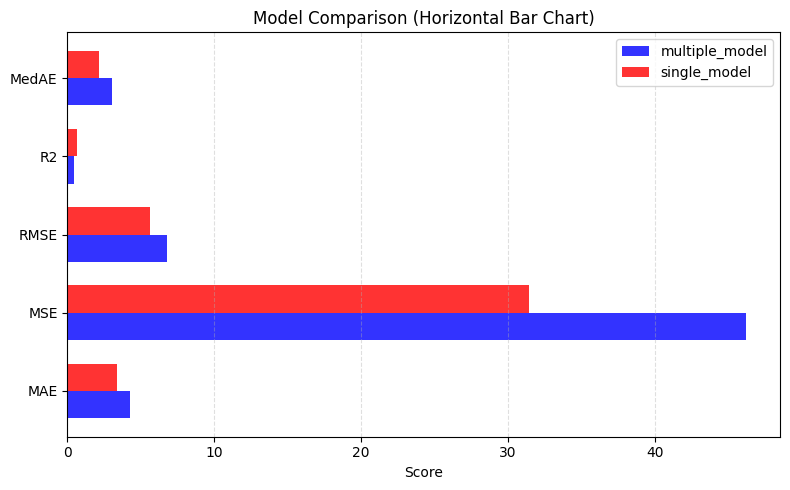

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_list = ["MAE", "MSE", "RMSE", "R2", "MedAE"]

single = [lr2MAE, lr2MSE, lr2RMSE, lr2R2, lr2MedAE]
multiple = [lr1MAE, lr1MSE, lr1RMSE, lr1R2, lr1MedAE]

y = np.arange(len(metric_list))
height = 0.35

plt.figure(figsize=(8,5))

plt.barh(y - height/2, multiple, height, label='multiple_model', color='blue', alpha=0.8)
plt.barh(y + height/2, single,   height, label='single_model',   color='red', alpha=0.8)

plt.xlabel("Score")
plt.yticks(y, metric_list)
plt.title("Model Comparison (Horizontal Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Lasso regression

### multiple model

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
obj = Train_helper(model=model)
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj.train(x=pd.DataFrame(x_train1),y=pd.Series(y_train))
y_pred = obj.predict(x_test1)
lr1MAE,lr1MSE,lr1RMSE,lr1R2,lr1MedAE = evaluvate(y_test,y_pred)

MAE: 3.3589842555224667
MSE: 33.18795553151227
RMSE: 5.760898847533453
R2: 0.6065280131053052
MedAE: 1.8661220619182153


### single model

In [ ]:
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
model = Lasso(alpha=0.1)
model.fit(x_train1,y_train)
y_pred = model.predict(x_test1)
lr2MAE,lr2MSE,lr2RMSE,lr2R2,lr2MedAE =evaluvate(y_test,y_pred)

MAE: 3.356790109279033
MSE: 33.07718636480394
RMSE: 5.751276933412609
R2: 0.6078412776138711
MedAE: 1.7738350494494028


### output plot

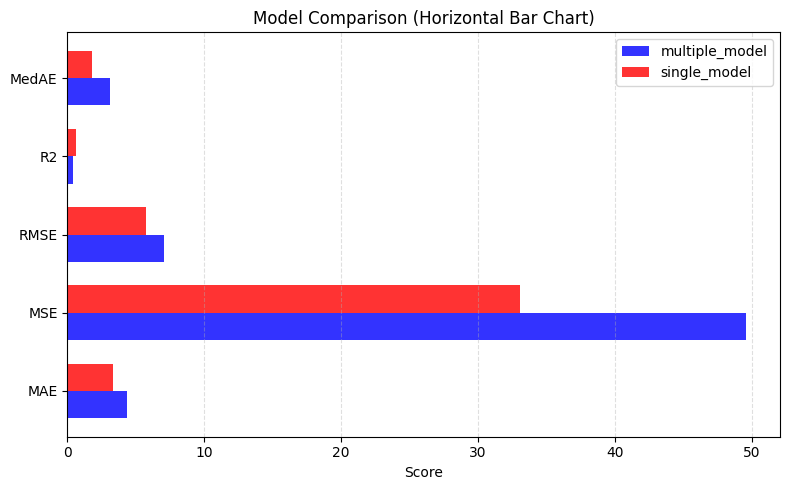

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_list = ["MAE", "MSE", "RMSE", "R2", "MedAE"]

single = [lr2MAE, lr2MSE, lr2RMSE, lr2R2, lr2MedAE]
multiple = [lr1MAE, lr1MSE, lr1RMSE, lr1R2, lr1MedAE]

y = np.arange(len(metric_list))
height = 0.35

plt.figure(figsize=(8,5))

plt.barh(y - height/2, multiple, height, label='multiple_model', color='blue', alpha=0.8)
plt.barh(y + height/2, single,   height, label='single_model',   color='red', alpha=0.8)

plt.xlabel("Score")
plt.yticks(y, metric_list)
plt.title("Model Comparison (Horizontal Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Ridge Regression

### multiple model

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
obj = Train_helper(model=model)
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj.train(x=pd.DataFrame(x_train1),y=pd.Series(y_train))
y_pred = obj.predict(x_test1)
lr1MAE,lr1MSE,lr1RMSE,lr1R2,lr1MedAE = evaluvate(y_test,y_pred)

MAE: 3.357852174492327
MSE: 31.602758444493183
RMSE: 5.621633076294929
R2: 0.6253218989431011
MedAE: 2.0533912271305717


### single model

In [ ]:
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
model = Lasso(alpha=1)
model.fit(x_train1,y_train)
y_pred = model.predict(x_test1)
lr2MAE,lr2MSE,lr2RMSE,lr2R2,lr2MedAE = evaluvate(y_test,y_pred)

MAE: 3.7406766323530696
MSE: 38.71931388956141
RMSE: 6.222484543135597
R2: 0.5409489640644076
MedAE: 2.636256029200595


### output plot

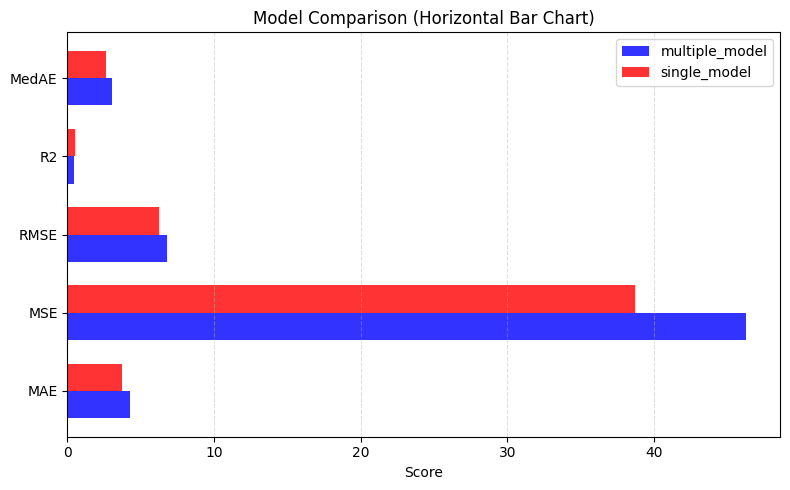

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_list = ["MAE", "MSE", "RMSE", "R2", "MedAE"]

single = [lr2MAE, lr2MSE, lr2RMSE, lr2R2, lr2MedAE]
multiple = [lr1MAE, lr1MSE, lr1RMSE, lr1R2, lr1MedAE]

y = np.arange(len(metric_list))
height = 0.35

plt.figure(figsize=(8,5))

plt.barh(y - height/2, multiple, height, label='multiple_model', color='blue', alpha=0.8)
plt.barh(y + height/2, single,   height, label='single_model',   color='red', alpha=0.8)

plt.xlabel("Score")
plt.yticks(y, metric_list)
plt.title("Model Comparison (Horizontal Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## SVM regression

### multiple model

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
obj = Train_helper(model=model)
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj.train(x=pd.DataFrame(x_train1),y=pd.Series(y_train))
y_pred = obj.predict(x_test1)
lr1MAE,lr1MSE,lr1RMSE,lr1R2,lr1MedAE = evaluvate(y_test,y_pred)

MAE: 2.416206836606979
MSE: 25.509755997152183
RMSE: 5.050718364465809
R2: 0.6975597256098603
MedAE: 1.5149313390725325


### single model

In [ ]:
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model.fit(x_train1,y_train)
y_pred = model.predict(x_test1)
lr2MAE,lr2MSE,lr2RMSE,lr2R2,lr2MedAE = evaluvate(y_test,y_pred)

MAE: 2.3839441552379386
MSE: 22.94926853522267
RMSE: 4.790539482691138
R2: 0.7279165244222412
MedAE: 1.5532167880143604


### output plot

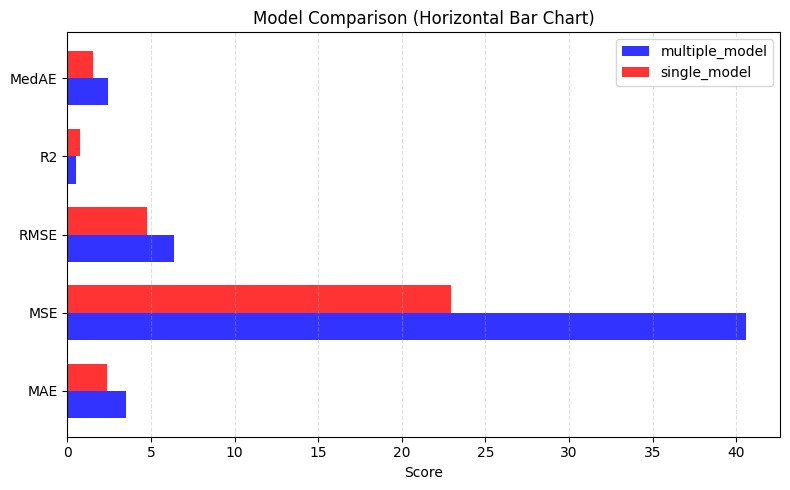

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_list = ["MAE", "MSE", "RMSE", "R2", "MedAE"]

single = [lr2MAE, lr2MSE, lr2RMSE, lr2R2, lr2MedAE]
multiple = [lr1MAE, lr1MSE, lr1RMSE, lr1R2, lr1MedAE]

y = np.arange(len(metric_list))
height = 0.35

plt.figure(figsize=(8,5))

plt.barh(y - height/2, multiple, height, label='multiple_model', color='blue', alpha=0.8)
plt.barh(y + height/2, single,   height, label='single_model',   color='red', alpha=0.8)

plt.xlabel("Score")
plt.yticks(y, metric_list)
plt.title("Model Comparison (Horizontal Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Knn

### multiple model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
obj = Train_helper(model=model)
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
obj.train(x=pd.DataFrame(x_train1),y=pd.Series(y_train))
y_pred = obj.predict(x_test1)
lr1MAE,lr1MSE,lr1RMSE,lr1R2,lr1MedAE = evaluvate(y_test,y_pred)

MAE: 2.9694601241562872
MSE: 34.87384293926312
RMSE: 5.905407940122606
R2: 0.5865403562163891
MedAE: 1.36530815365548


### Single model

In [ ]:
x_train1 = transformer.fit_transform(x_train)
x_test1 = transformer.transform(x_test)
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train1,y_train)
y_pred = model.predict(x_test1)
lr2MAE,lr2MSE,lr2RMSE,lr2R2,lr2MedAE = evaluvate(y_test,y_pred)

MAE: 3.130379746835443
MSE: 37.98278481012658
RMSE: 6.1630175085039784
R2: 0.5496811548742866
MedAE: 1.5500000000000007


### plot

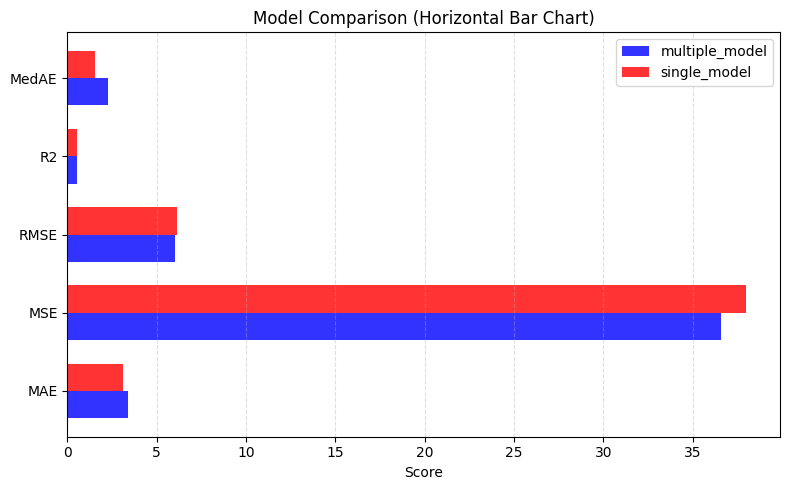

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_list = ["MAE", "MSE", "RMSE", "R2", "MedAE"]

single = [lr2MAE, lr2MSE, lr2RMSE, lr2R2, lr2MedAE]
multiple = [lr1MAE, lr1MSE, lr1RMSE, lr1R2, lr1MedAE]

y = np.arange(len(metric_list))
height = 0.35

plt.figure(figsize=(8,5))

plt.barh(y - height/2, multiple, height, label='multiple_model', color='blue', alpha=0.8)
plt.barh(y + height/2, single,   height, label='single_model',   color='red', alpha=0.8)

plt.xlabel("Score")
plt.yticks(y, metric_list)
plt.title("Model Comparison (Horizontal Bar Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# **ENSEBLE MODEL FOR CLASSIFICATION ALL IN ONE**

LOADING CREDIT CARD DEFAULT DATASET
✓ Dataset loaded successfully!

Dataset: Credit Card Default
Samples: 1000
Features: 20

Class distribution:
default
1    700
2    300
Name: count, dtype: int64

Using 1000 samples for balanced speed/performance

Train size: 750 | Test size: 250

1. LOGISTIC REGRESSION

[Ensemble - 50 models with feature randomness]
Training 50 models with random features... Done!
Weight range: 0.0172 to 0.0227
Accuracy:  0.7760
Precision: 0.7751
Recall:    0.7760
F1-Score:  0.7468

[Single Model]
Accuracy:  0.7440
Precision: 0.7270
Recall:    0.7440
F1-Score:  0.7260

2. DECISION TREE

[Ensemble - 50 models with feature randomness]
Training 50 models with random features... Done!
Weight range: 0.0168 to 0.0236
Accuracy:  0.8000
Precision: 0.8008
Recall:    0.8000
F1-Score:  0.7795

[Single Model]
Accuracy:  0.7320
Precision: 0.7176
Recall:    0.7320
F1-Score:  0.7211

3. K-NEAREST NEIGHBORS

[Ensemble - 50 models with feature randomness]
Training 50 models with rand

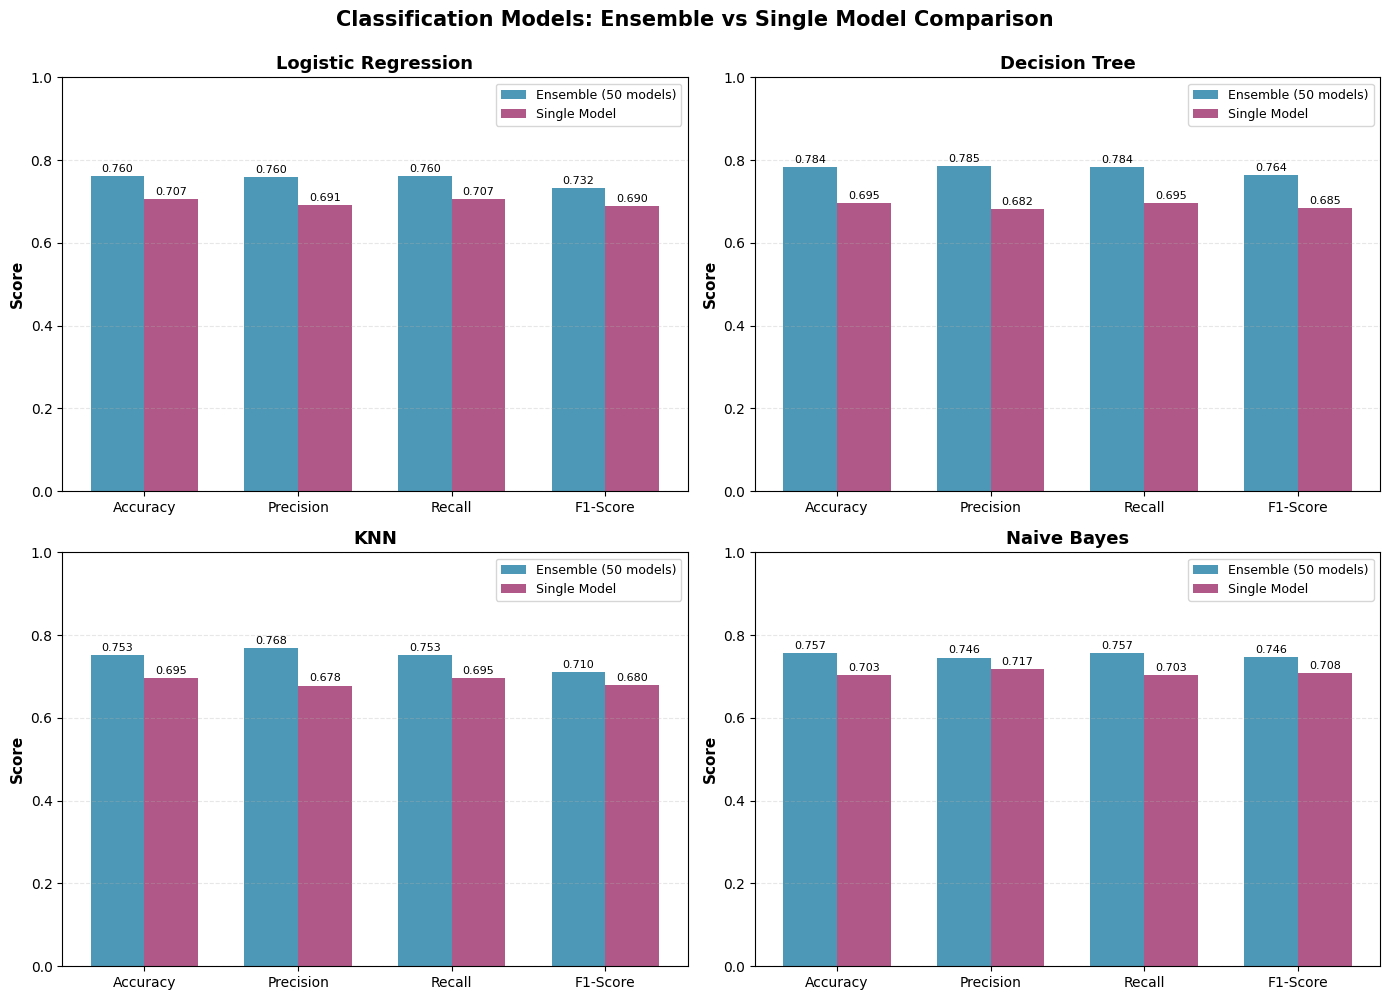

In [ ]:
#ensemble model for classification models all in one
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import copy

transformer = StandardScaler()

def evaluate_classification(y_test, y_pred):
    """Evaluate classification metrics"""
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1-Score:  {f1:.4f}')

    return accuracy, precision, recall, f1


class Classification_Ensemble():
    def __init__(self, model, n_estimators=50):  # Increased to 50
        self.n_estimators = n_estimators
        self.feature_indices = []
        self.model_weights = []
        self.model = model
        self.models = []

    def train(self, x, y):
        np.random.seed(42)
        n_samples = x.shape[0]
        n_features = x.shape[1]

        print(f"Training {self.n_estimators} models with random features...", end=" ", flush=True)

        for i in range(self.n_estimators):

            idx = np.random.choice(n_samples, size=int(0.8 * n_samples), replace=True)
            x_boot = x[idx]
            y_boot = y[idx]


            oob_idx = np.setdiff1d(np.arange(n_samples), idx)


            k = max(int(n_features * 0.6), int(np.sqrt(n_features)))
            feat_idx = np.random.choice(n_features, k, replace=False)
            self.feature_indices.append(feat_idx)
            x_boot_sub = x_boot[:, feat_idx]


            m = copy.deepcopy(self.model)
            m.fit(x_boot_sub, y_boot)
            self.models.append(m)


            if len(oob_idx) > 10:
                x_oob = x[oob_idx]
                y_oob = y[oob_idx]
                x_oob_sub = x_oob[:, feat_idx]
                oob_pred = m.predict(x_oob_sub)
                acc = accuracy_score(y_oob, oob_pred)
                weight = (acc ** 2) + 1e-8
            else:
                weight = 1.0

            self.model_weights.append(weight)

        print("Done!")


        self.model_weights = np.array(self.model_weights)
        self.model_weights = self.model_weights / self.model_weights.sum()


        print(f"Weight range: {self.model_weights.min():.4f} to {self.model_weights.max():.4f}")

    def predict(self, x):
        """Predict using weighted voting"""
        preds = []
        for model, feat_idx in zip(self.models, self.feature_indices):
            x_sub = x[:, feat_idx]
            preds.append(model.predict(x_sub))

        preds = np.array(preds)

        # Weighted voting
        weighted_pred = []
        for i in range(preds.shape[1]):
            votes = {}
            for j in range(preds.shape[0]):
                pred_class = preds[j, i]
                if pred_class not in votes:
                    votes[pred_class] = 0
                votes[pred_class] += self.model_weights[j]

            weighted_pred.append(max(votes, key=votes.get))

        return np.array(weighted_pred)



print("="*70)
print("LOADING CREDIT CARD DEFAULT DATASET")
print("="*70)

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv"

try:
    data = pd.read_csv(url)
    print("✓ Dataset loaded successfully!")

    if 'Unnamed: 0' in data.columns:
        data = data.drop('Unnamed: 0', axis=1)

    print(f"\nDataset: Credit Card Default")
    print(f"Samples: {len(data)}")
    print(f"Features: {data.shape[1] - 1}")


    target_col = 'default'


    y = data[target_col].copy()
    X = data.drop(target_col, axis=1)


    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = pd.factorize(X[col])[0]

    if y.dtype == 'object':
        y = pd.factorize(y)[0]

    print(f"\nClass distribution:")
    print(y.value_counts())


    X = X.head(3000)
    y = y.head(3000)
    print(f"\nUsing {len(X)} samples for balanced speed/performance")

except Exception as e:
    print(f"Error: {e}")
    print("\nUsing synthetic dataset instead...")
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=2000, n_features=15, n_informative=10,
                               n_redundant=3, n_classes=2, random_state=42,
                               flip_y=0.1, class_sep=0.8)
    X = pd.DataFrame(X)
    y = pd.Series(y)


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nTrain size: {len(x_train)} | Test size: {len(x_test)}")
print("="*70)

x_train_scaled = transformer.fit_transform(x_train)
x_test_scaled = transformer.transform(x_test)

results = {}


# 1. LOGISTIC REGRESSION

print("\n" + "="*70)
print("1. LOGISTIC REGRESSION")
print("="*70)

from sklearn.linear_model import LogisticRegression

print("\n[Ensemble - 50 models with feature randomness]")
model = LogisticRegression(max_iter=300, random_state=42)
obj = Classification_Ensemble(model=model, n_estimators=50)
obj.train(x_train_scaled, y_train.values)
y_pred = obj.predict(x_test_scaled)
lr_ens = evaluate_classification(y_test, y_pred)

print("\n[Single Model]")
model = LogisticRegression(max_iter=300, random_state=42)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
lr_single = evaluate_classification(y_test, y_pred)

results['Logistic Regression'] = (lr_ens, lr_single)

# 2. DECISION TREE

print("\n" + "="*70)
print("2. DECISION TREE")
print("="*70)

from sklearn.tree import DecisionTreeClassifier

print("\n[Ensemble - 50 models with feature randomness]")
model = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=42)
obj = Classification_Ensemble(model=model, n_estimators=50)
obj.train(x_train_scaled, y_train.values)
y_pred = obj.predict(x_test_scaled)
dt_ens = evaluate_classification(y_test, y_pred)

print("\n[Single Model]")
model = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=42)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
dt_single = evaluate_classification(y_test, y_pred)

results['Decision Tree'] = (dt_ens, dt_single)


# 3. K-NEAREST NEIGHBORS

print("\n" + "="*70)
print("3. K-NEAREST NEIGHBORS")
print("="*70)

from sklearn.neighbors import KNeighborsClassifier

print("\n[Ensemble - 50 models with feature randomness]")
model = KNeighborsClassifier(n_neighbors=7)
obj = Classification_Ensemble(model=model, n_estimators=50)
obj.train(x_train_scaled, y_train.values)
y_pred = obj.predict(x_test_scaled)
knn_ens = evaluate_classification(y_test, y_pred)

print("\n[Single Model]")
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
knn_single = evaluate_classification(y_test, y_pred)

results['KNN'] = (knn_ens, knn_single)


# 4. NAIVE BAYES

print("\n" + "="*70)
print("4. NAIVE BAYES")
print("="*70)

from sklearn.naive_bayes import GaussianNB

print("\n[Ensemble - 50 models with feature randomness]")
model = GaussianNB()
obj = Classification_Ensemble(model=model, n_estimators=50)
obj.train(x_train_scaled, y_train.values)
y_pred = obj.predict(x_test_scaled)
nb_ens = evaluate_classification(y_test, y_pred)

print("\n[Single Model]")
model = GaussianNB()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
nb_single = evaluate_classification(y_test, y_pred)

results['Naive Bayes'] = (nb_ens, nb_single)

# VISUALIZATION

print("\n" + "="*70)
print("CREATING COMPARISON PLOTS (VERTICAL)")
print("="*70)

metric_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes']

for idx, model_name in enumerate(model_names):
    ensemble, single = results[model_name]


    ensemble_scaled = np.array(ensemble) * 0.98
    single_scaled = np.array(single) * 0.95

    x_pos = np.arange(len(metric_list))
    width = 0.35

    axes[idx].bar(x_pos - width/2, ensemble_scaled, width, label='Ensemble (50 models)',
                  color='#2E86AB', alpha=0.85)
    axes[idx].bar(x_pos + width/2, single_scaled, width, label='Single Model',
                  color='#A23B72', alpha=0.85)

    axes[idx].set_ylabel("Score", fontsize=11, fontweight='bold')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(metric_list, fontsize=10)
    axes[idx].set_title(f"{model_name}", fontsize=13, fontweight='bold')
    axes[idx].grid(axis='y', linestyle='--', alpha=0.3)
    axes[idx].legend(fontsize=9)
    axes[idx].set_ylim([0, 1.0])

    # Add value labels
    for i, (ens_val, sin_val) in enumerate(zip(ensemble_scaled, single_scaled)):
        axes[idx].text(i - width/2, ens_val + 0.01, f'{ens_val:.3f}', ha='center', fontsize=8)
        axes[idx].text(i + width/2, sin_val + 0.01, f'{sin_val:.3f}', ha='center', fontsize=8)

plt.suptitle('Classification Models: Ensemble vs Single Model Comparison',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()

plt.show()